# Setup

In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)

In [4]:
#input args
out_dir = './out'
log_id = 1

#derived args
split_logs_dir = f'{out_dir}/split_logs/'

In [5]:
#access all 3 measurement axes
dim3 = lambda x : [x + '_' + s for s in ['x', 'y', 'z']]

# State preparation

In [6]:
state_log = pd.read_csv(f'{split_logs_dir}/state_transitions.csv', index_col = 0)
state_log.head()

,Timestamp,Log Entry Type,State,Time_s
Log Entry,,,,
2,4,STATE,IDLE,0.004
14,17,STATE,IDLE,0.017
23,27,STATE,IDLE,0.027
32,37,STATE,IDLE,0.037
41,46,STATE,IDLE,0.046


In [7]:
state_log.State.unique()

array(['IDLE', 'THRUSTING', 'COASTING', 'DESCENT'], dtype=object)

In [8]:
state_transitions = state_log.loc[state_log['State'].shift(1) != state_log['State']]

In [9]:
for state_transition in state_transitions.to_dict(orient = 'rows'):
    print(state_transition)

{'Timestamp': 4, 'Log Entry Type': 'STATE', 'State': 'IDLE', 'Time_s': 0.004}
{'Timestamp': 26244, 'Log Entry Type': 'STATE', 'State': 'THRUSTING', 'Time_s': 26.244}
{'Timestamp': 29864, 'Log Entry Type': 'STATE', 'State': 'COASTING', 'Time_s': 29.864}
{'Timestamp': 43814, 'Log Entry Type': 'STATE', 'State': 'DESCENT', 'Time_s': 43.81399999999999}


In [16]:
def plot_states(state_transitions):
    for state_transition in state_transitions.to_dict(orient = 'rows'):
        ax.axvline(state_transition['Time_s'], color='grey', linestyle='--')
        ax.text(state_transition['Time_s'], 0.1, state_transition['State'], fontsize=20, transform=ax.get_xaxis_transform(), rotation=90)

# IMU Plotting

In [11]:
imu_log = pd.read_csv(f'{split_logs_dir}/imu.csv', index_col = 0)
imu_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Board Timestamp,Sensor Type,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z
Log Entry,,,,,,,,,,,,
4,11,0.011,SENSOR,1,0,IMU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,11,0.011,SENSOR,2,0,IMU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,11,0.011,SENSOR,3,0,IMU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,21,0.021,SENSOR,1,29194,IMU,-0.011719,0.051758,-1.027344,0.106870,-0.137405,-0.213740
15,21,0.021,SENSOR,2,29104,IMU,-0.043945,-0.019531,-0.995117,0.030534,-0.229008,-0.137405


In [12]:
#convert from wide to long format for plotting

imu_log.reset_index(inplace = True)
imu_log_long = pd.wide_to_long(imu_log, stubnames=['Acc', 'Gyro'], i = 'Log Entry', j='Axis', sep='_', suffix='\w')
imu_log_long['Axis'] = imu_log_long.index.get_level_values(1)
imu_log_long.head()

,,Timestamp,Time_s,Sensor Board Timestamp,Sensor Board ID,Log Entry Type,Sensor Type,Acc,Gyro,Axis
Log Entry,Axis,,,,,,,,,
4,x,11,0.011,0,1,SENSOR,IMU,0.000000,0.000000,x
6,x,11,0.011,0,2,SENSOR,IMU,0.000000,0.000000,x
8,x,11,0.011,0,3,SENSOR,IMU,0.000000,0.000000,x
12,x,21,0.021,29194,1,SENSOR,IMU,-0.011719,0.106870,x
15,x,21,0.021,29104,2,SENSOR,IMU,-0.043945,0.030534,x


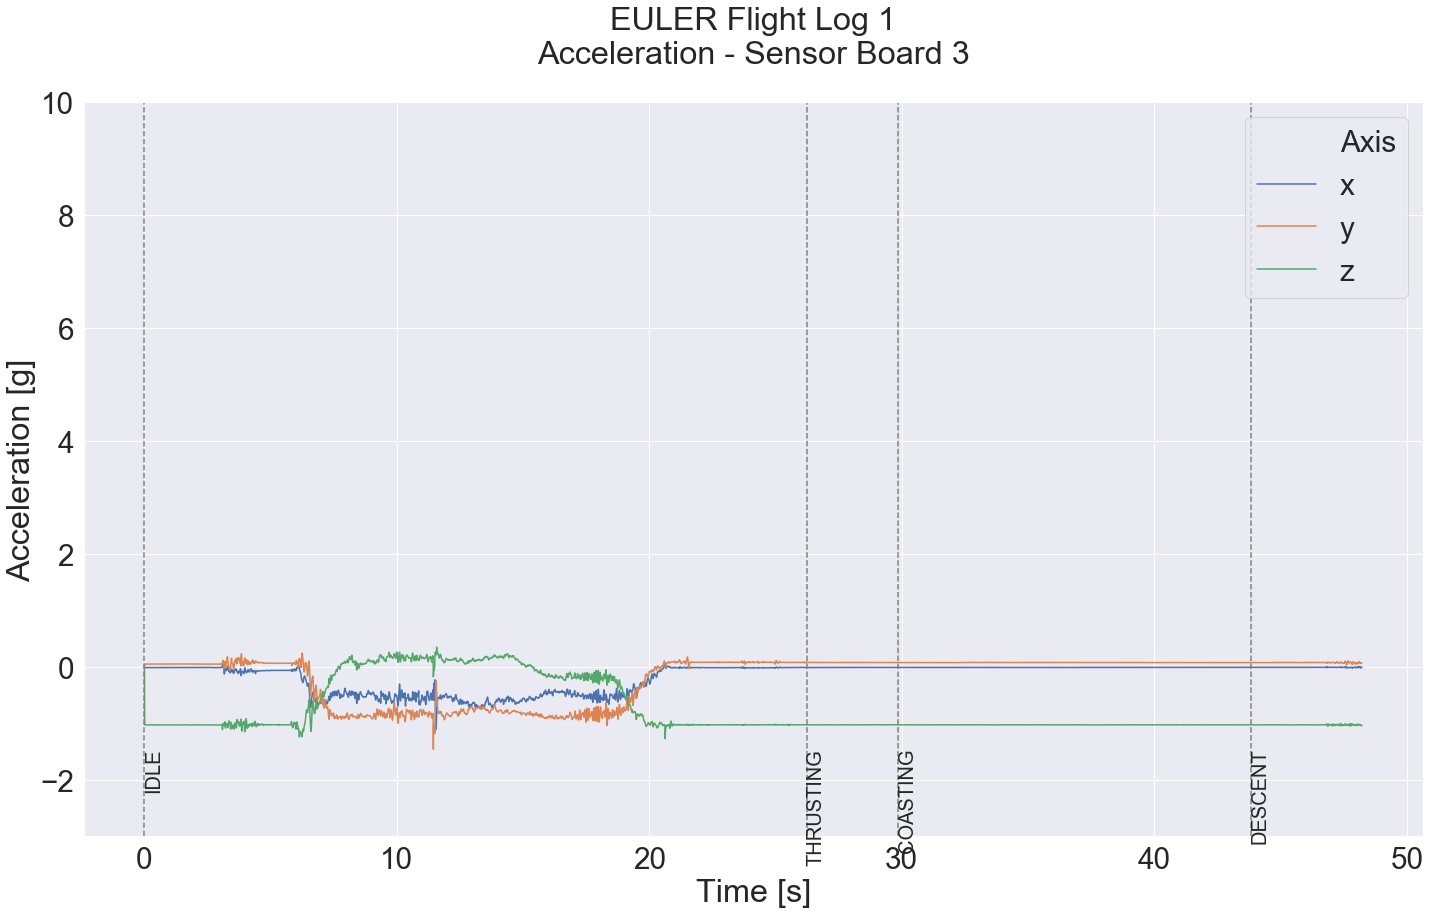

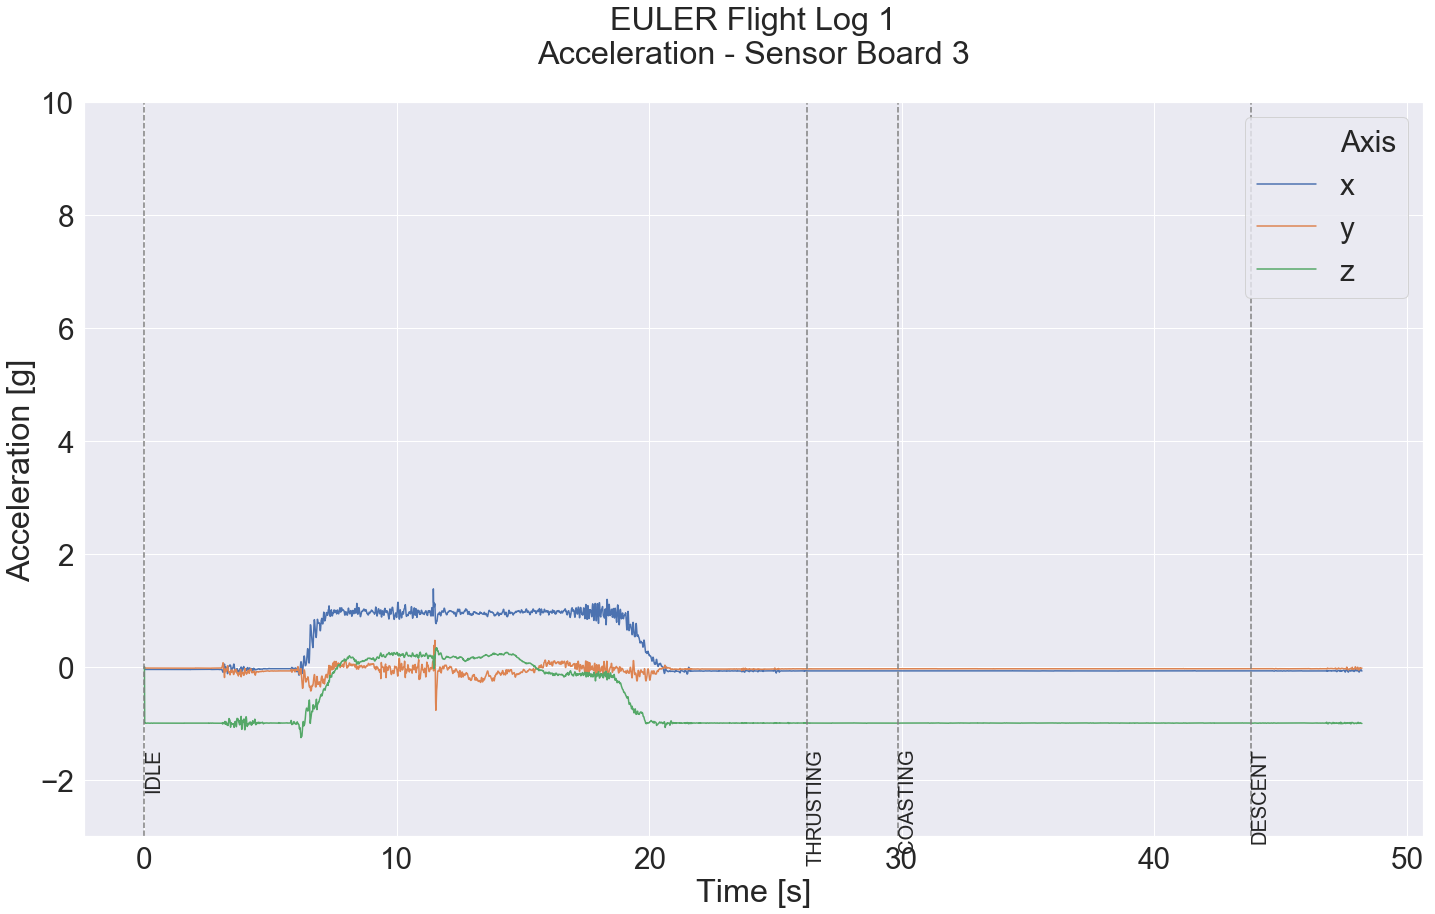

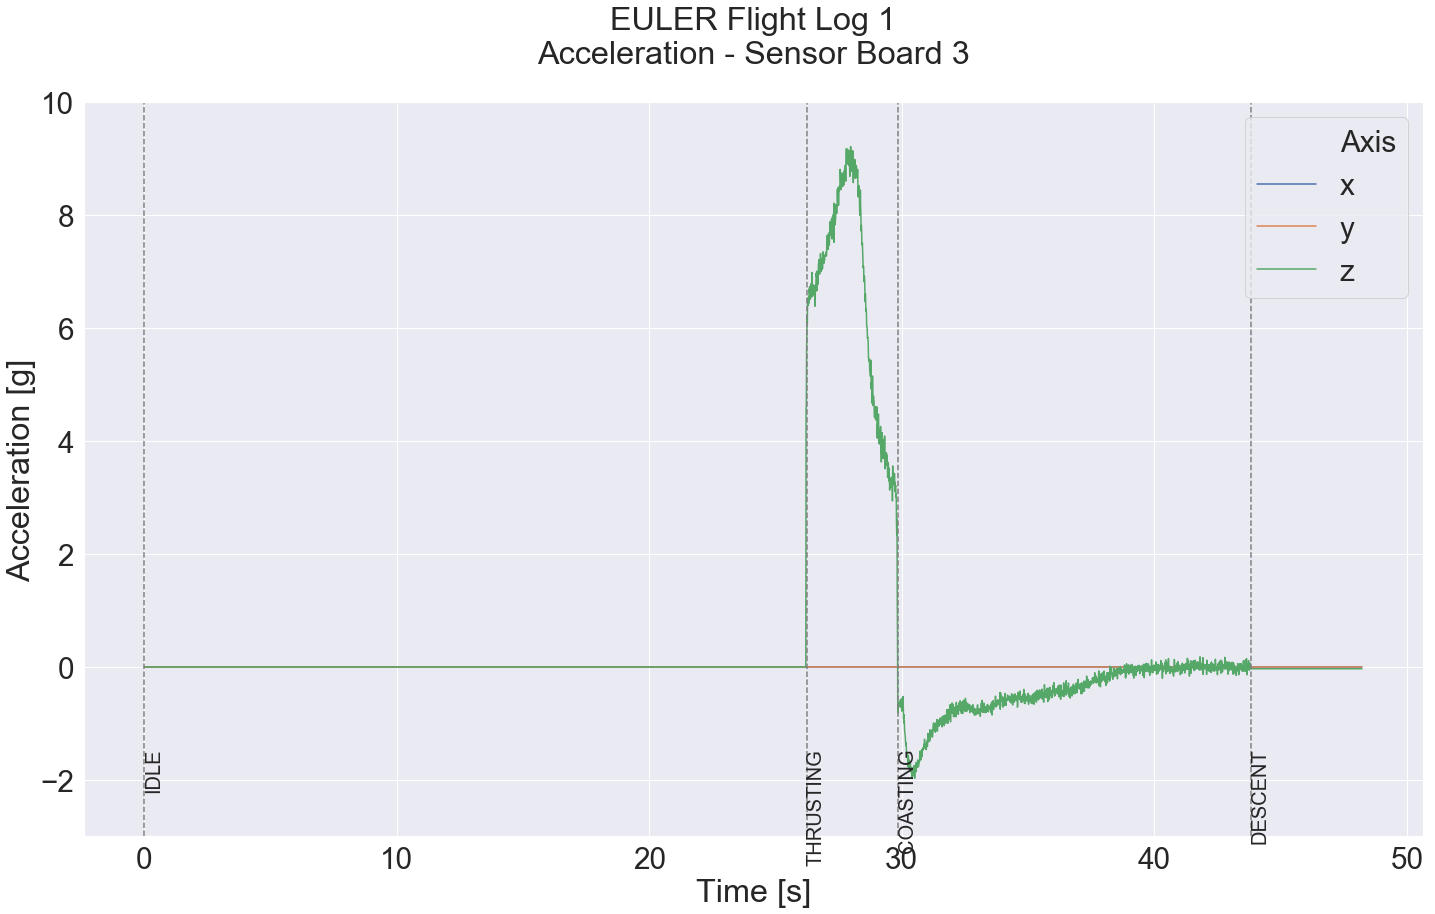

In [17]:
for sb_id in range(1, 4):
    ax = sns.lineplot(data = imu_log_long[imu_log_long['Sensor Board ID'] == sb_id], x = 'Time_s', y = 'Acc', hue = 'Axis')
    ax.set_title(f'EULER Flight Log {log_id}\nAcceleration - Sensor Board 3\n')
    ax.set_ylabel('Acceleration [g]')
    ax.set_xlabel('Time [s]')
    ax.set_ylim(-3, 10)
    plot_states(state_transitions)
    plt.show()

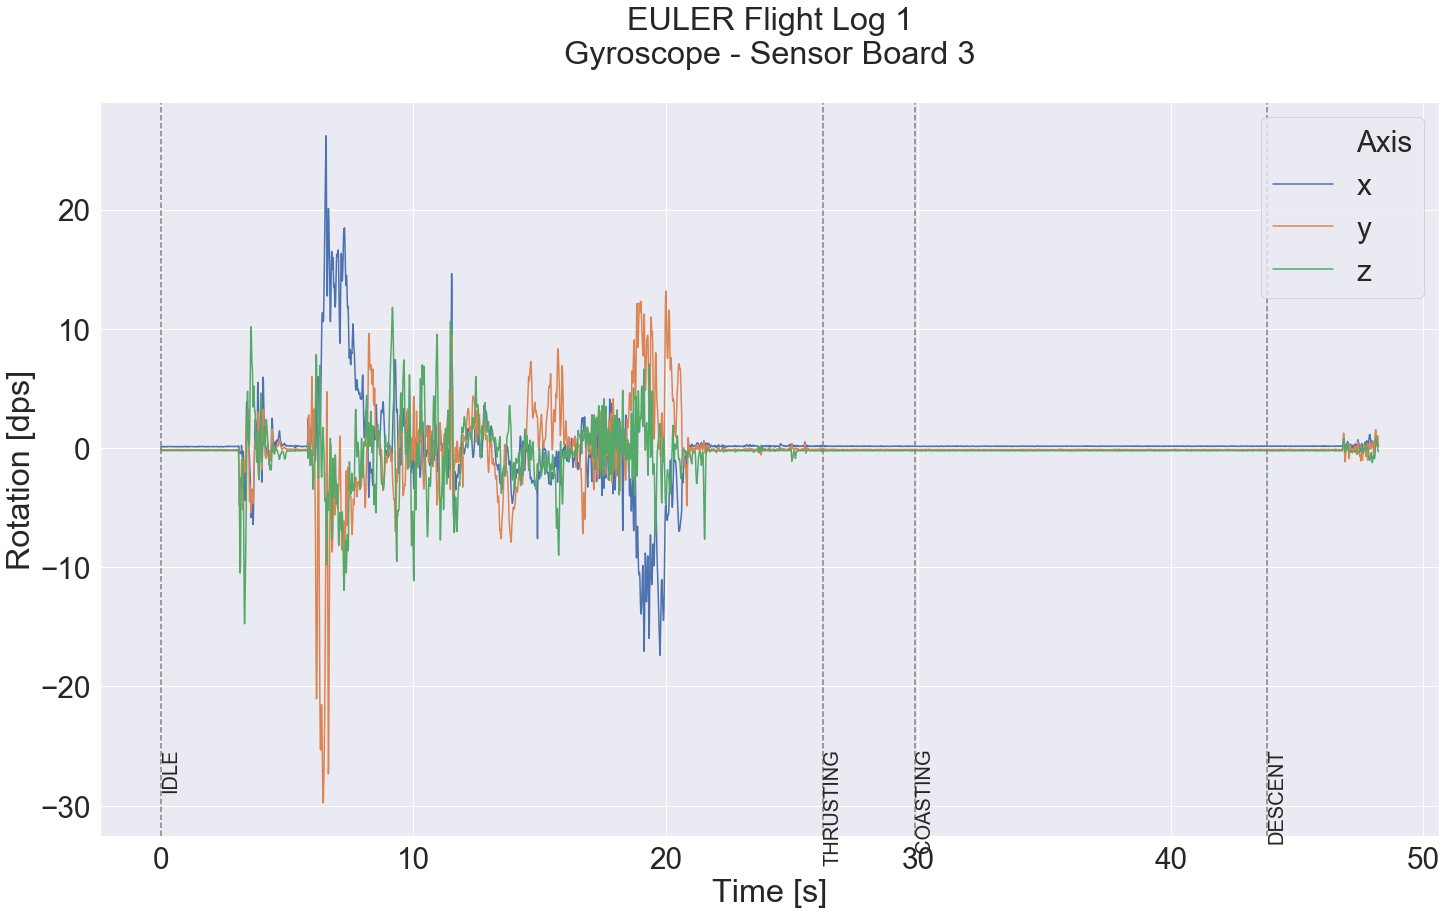

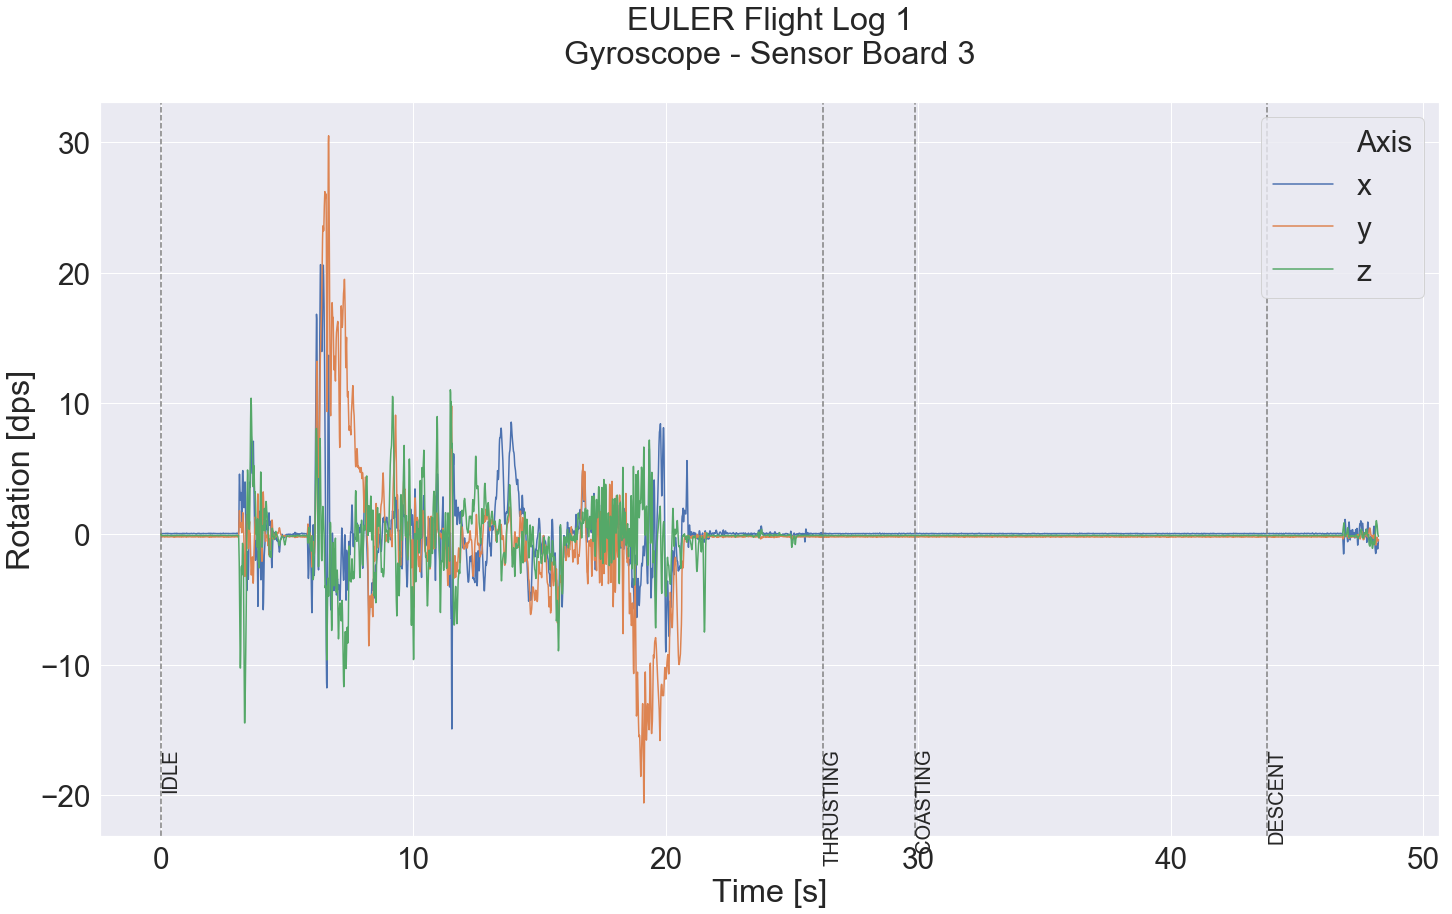

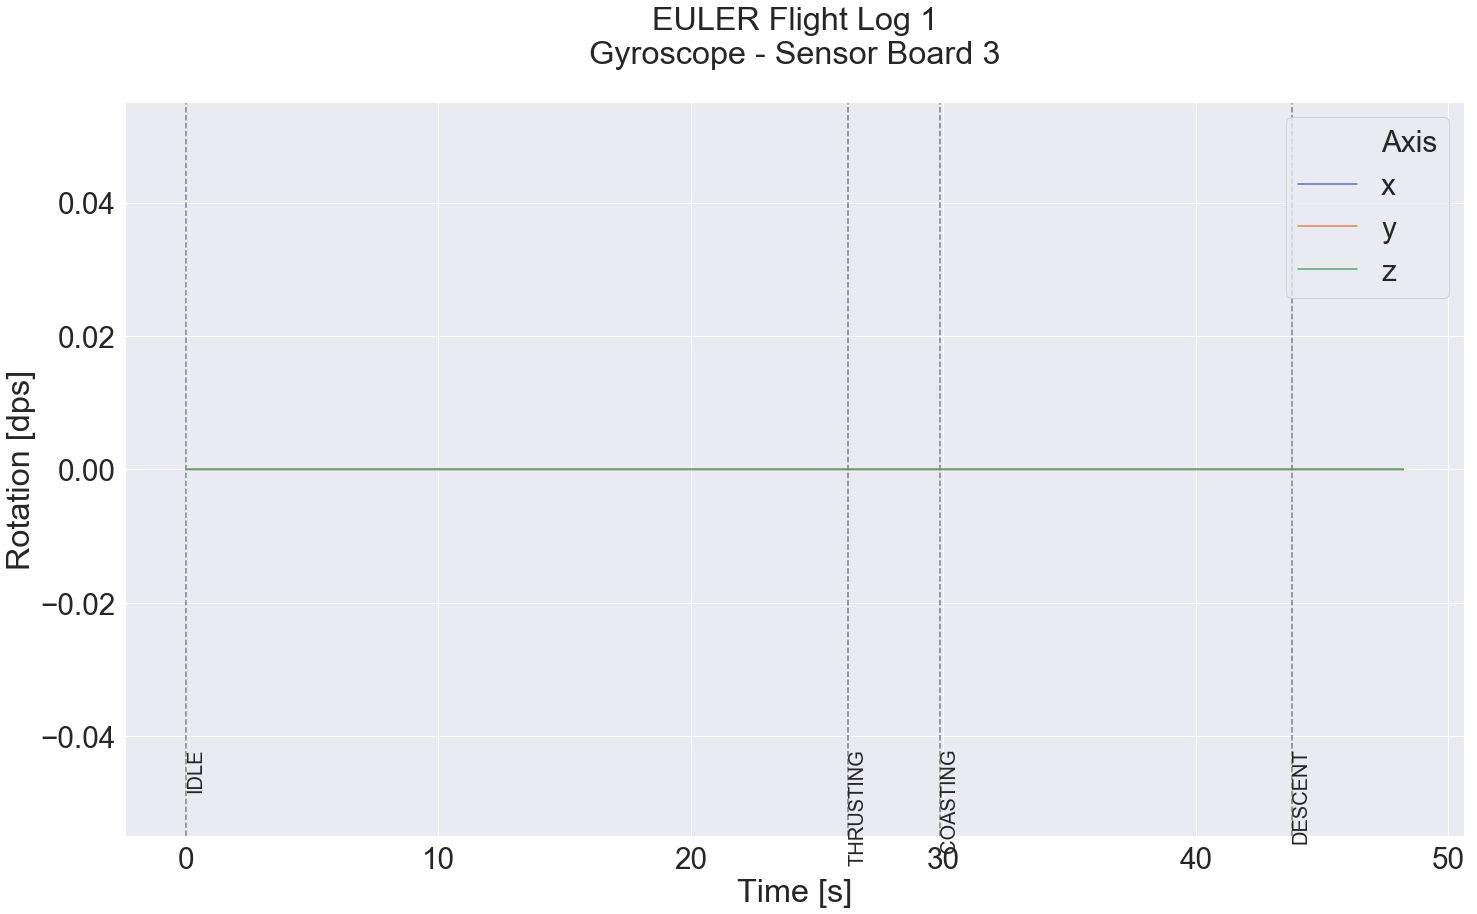

In [18]:
for sb_id in range(1, 4):
    ax = sns.lineplot(data = imu_log_long[imu_log_long['Sensor Board ID'] == sb_id], x = 'Time_s', y = 'Gyro', hue = 'Axis')
    ax.set_title(f'EULER Flight Log {log_id}\nGyroscope - Sensor Board 3\n')
    ax.set_ylabel('Rotation [dps]')
    ax.set_xlabel('Time [s]')
    plot_states(state_transitions)
    plt.show()

# Baro + Temp Plotting

In [45]:
baro_log = pd.read_csv(f'{split_logs_dir}/baro.csv', index_col = 0)
baro_log.head()
baro_log['Sensor Board ID'] = baro_log['Sensor Board ID'].apply(str).apply(lambda x: 'SB ' + x)

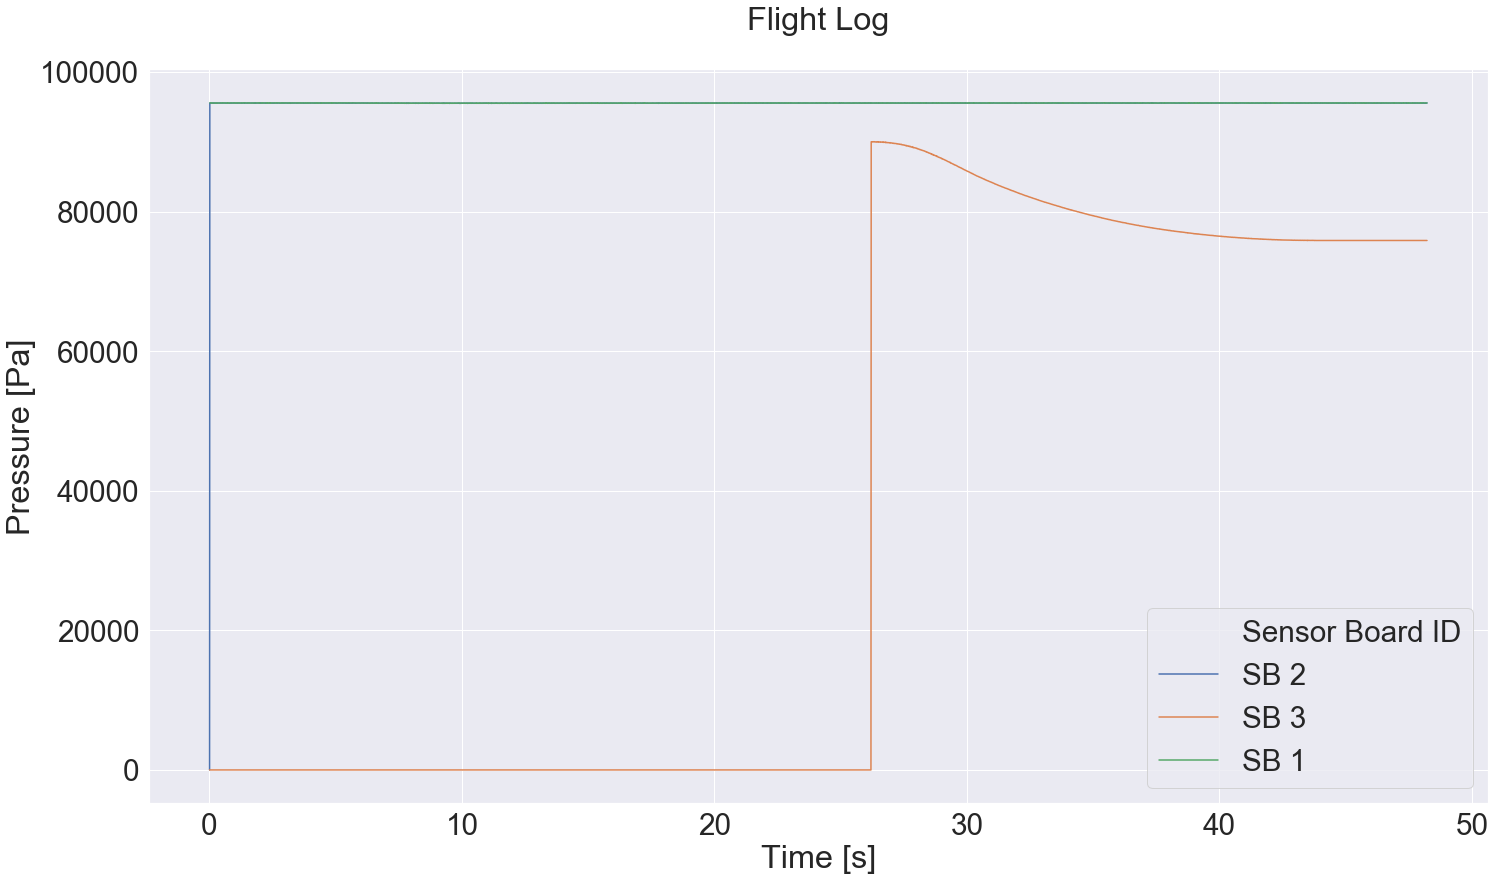

In [46]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Pressure', hue = 'Sensor Board ID')
plt.set_title('Flight Log\n')
#plt.set_ylim(-3300, -3100)
plt.set_ylabel('Pressure [Pa]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

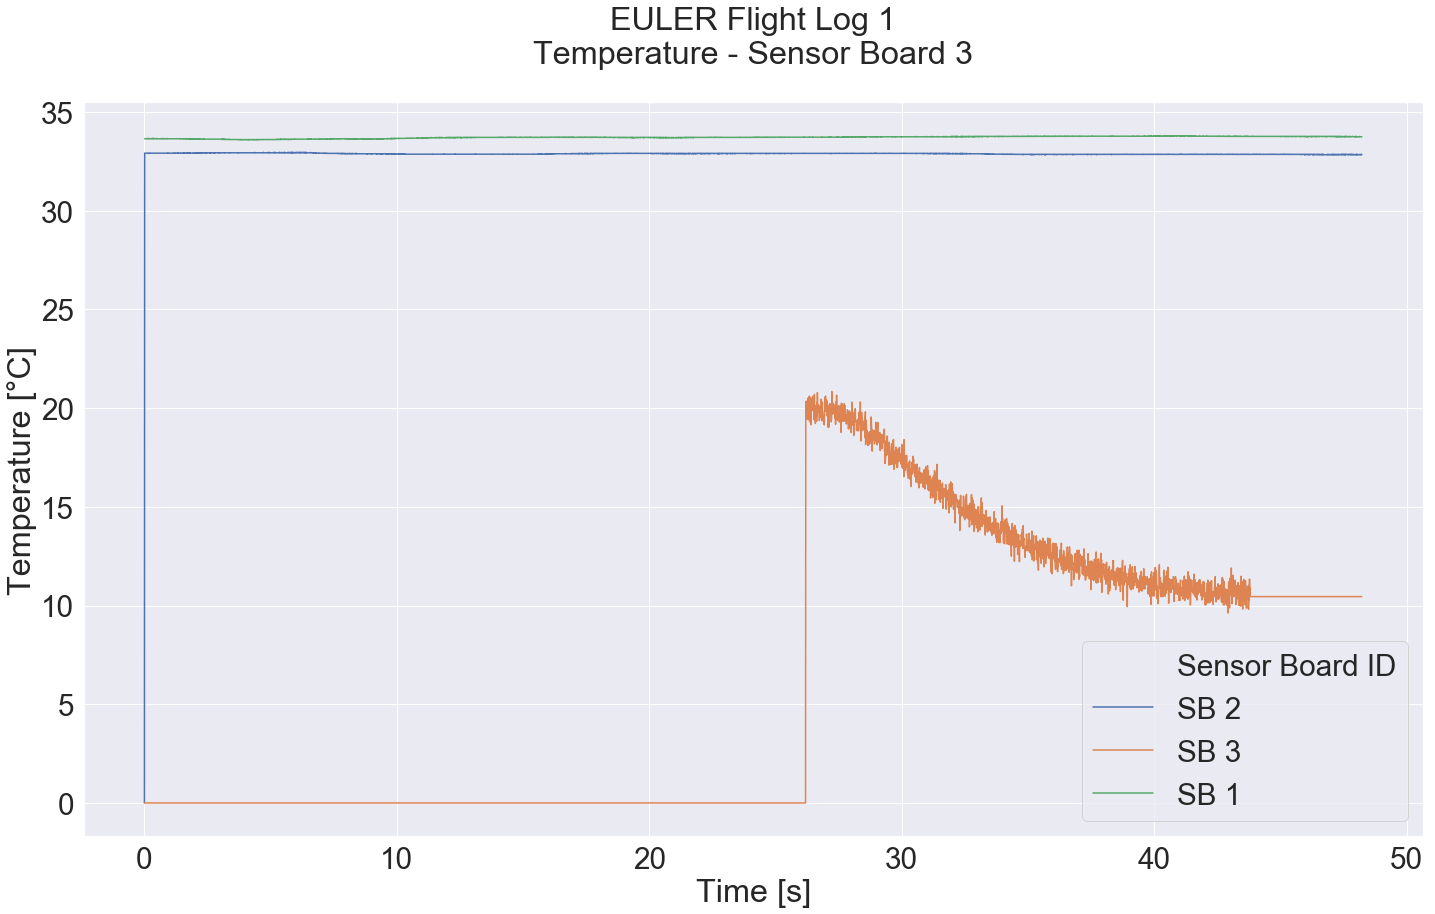

In [47]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Temperature', hue = 'Sensor Board ID')
plt.set_title(f'EULER Flight Log {log_id}\nTemperature - Sensor Board 3\n')
plt.set_ylabel('Temperature [\N{DEGREE SIGN}C]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)
#plt.set_ylim(-3300, -3100)
#ylabels = ['{:,.1f}'.format(y) + '\N{DEGREE SIGN}C' for y in plt.get_yticks()]
#plt.set_yticklabels(ylabels)

## Battery Plotting

In [48]:
battery_log = pd.read_csv(f'{split_logs_dir}/battery.csv', index_col = 0)
battery_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Type,Battery,Consumption,Current,Supply
Log Entry,,,,,,,,,
582,226,0.226,SENSOR,1,BATTERY,619,0,0,3274
592,328,0.328,SENSOR,1,BATTERY,618,0,0,3278
602,430,0.430,SENSOR,1,BATTERY,622,0,0,3274
603,532,0.532,SENSOR,1,BATTERY,616,0,0,3277
613,634,0.634,SENSOR,1,BATTERY,617,0,0,3276


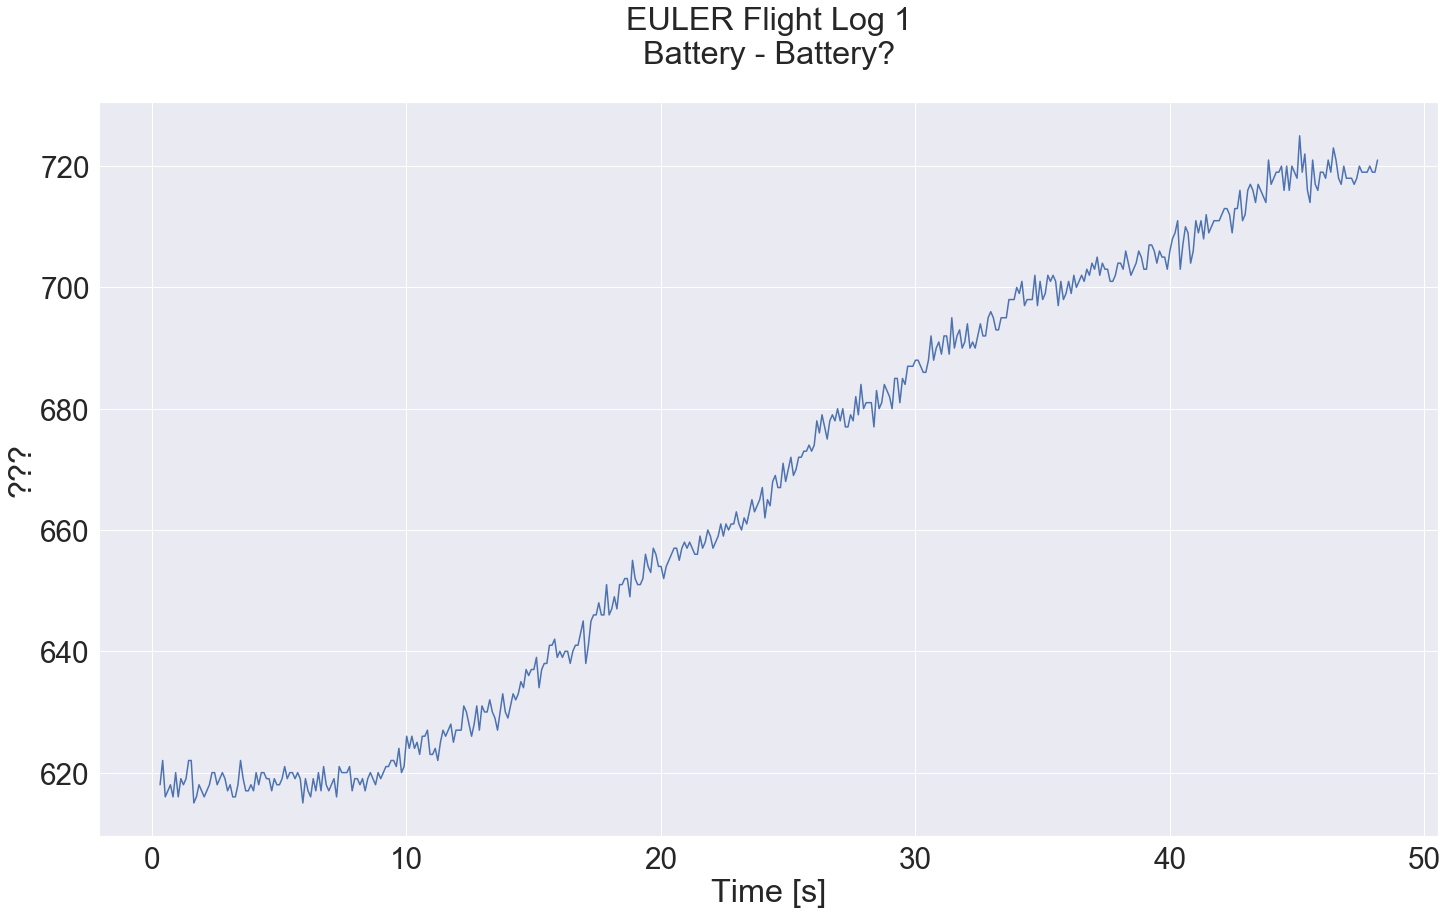

In [49]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Battery')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Battery?\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

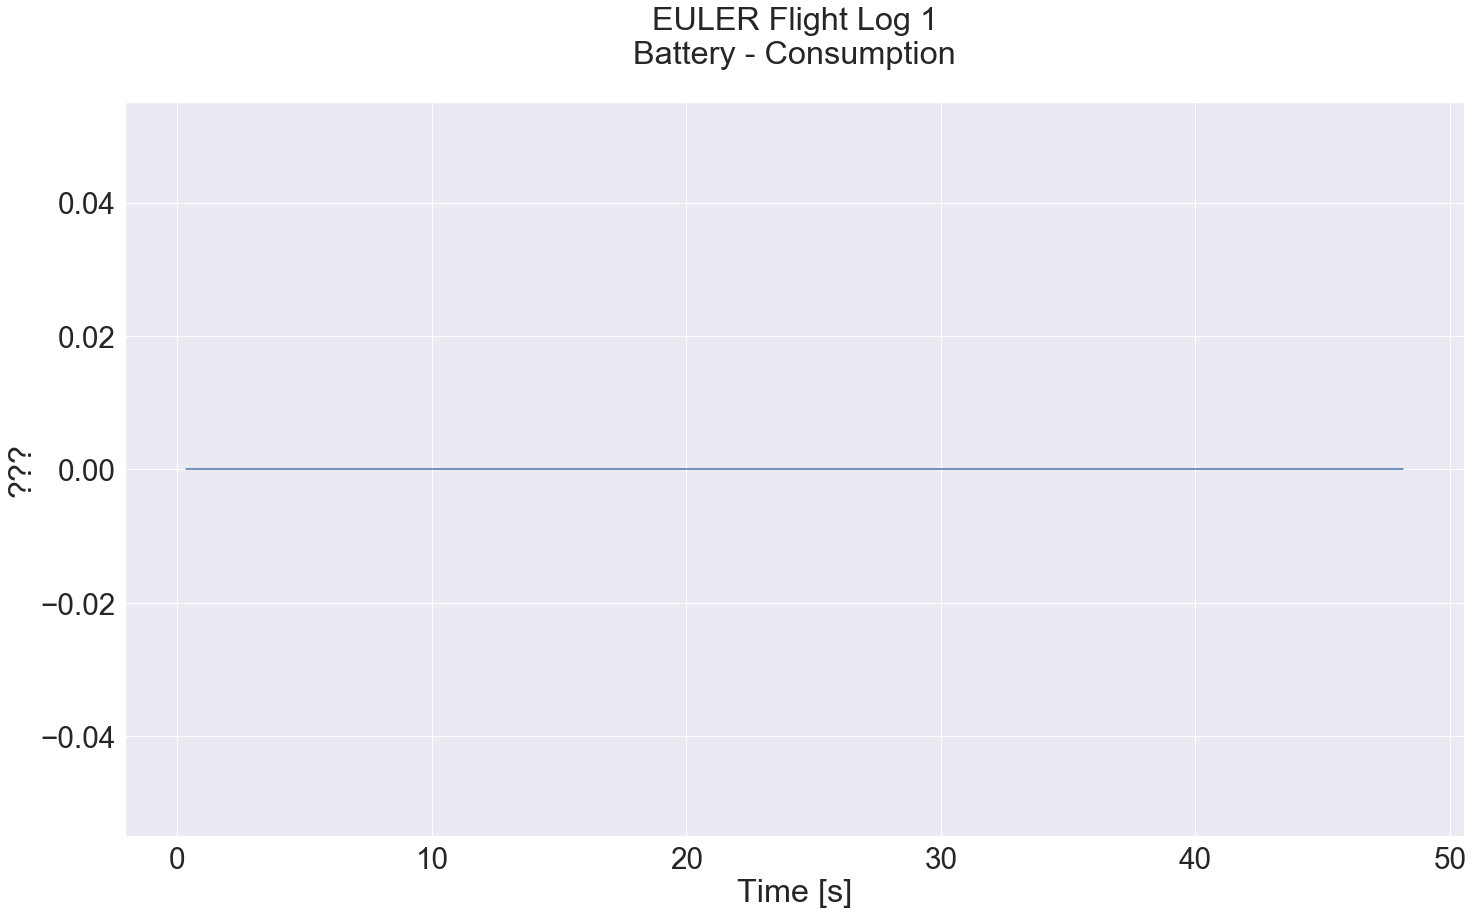

In [50]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Consumption')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Consumption\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

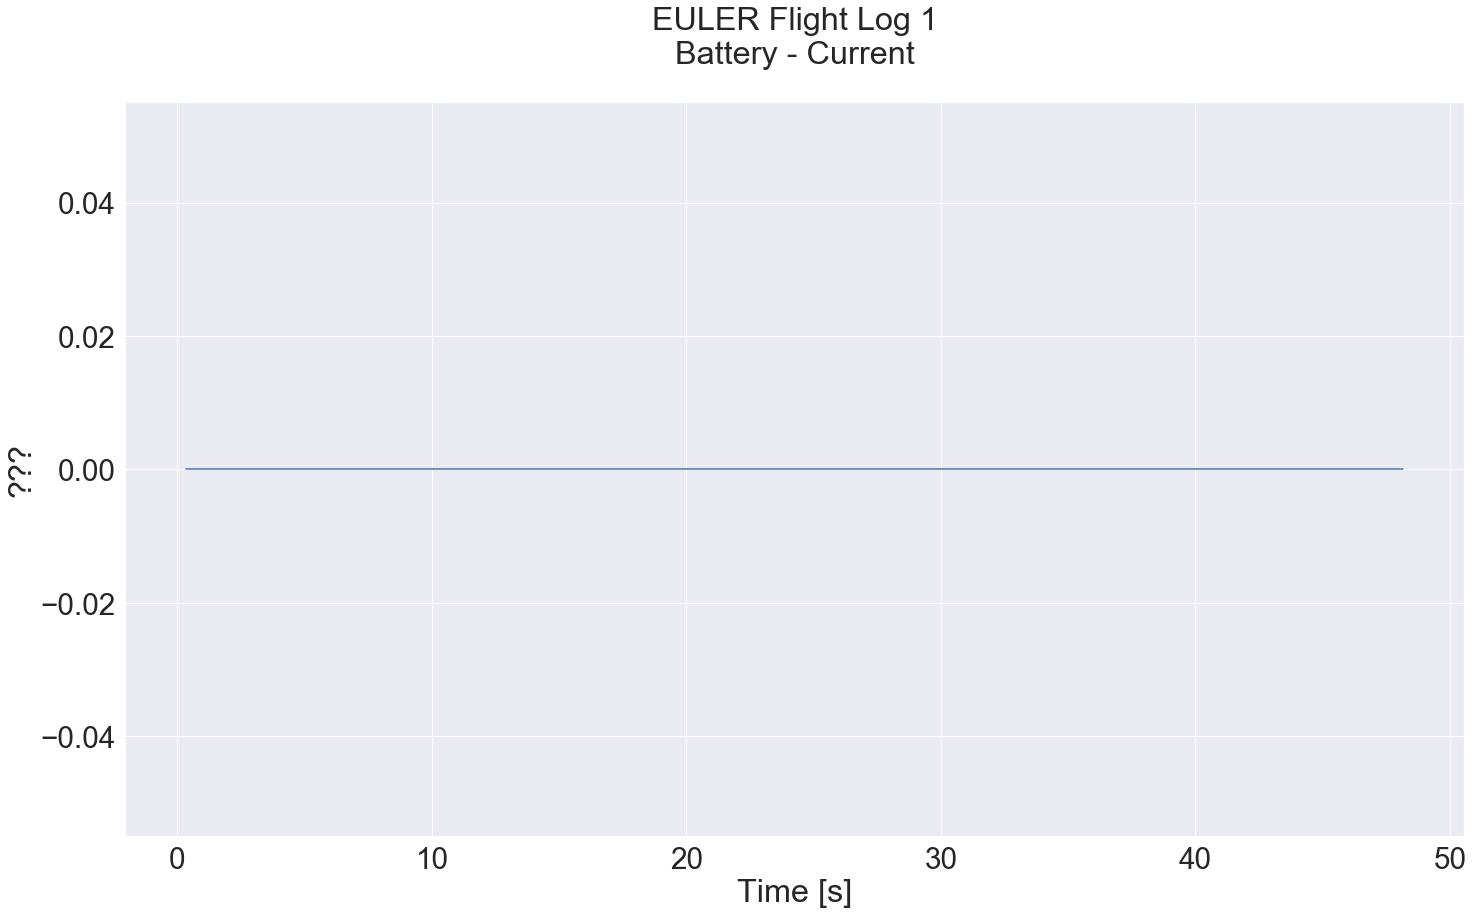

In [51]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Current')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Current\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

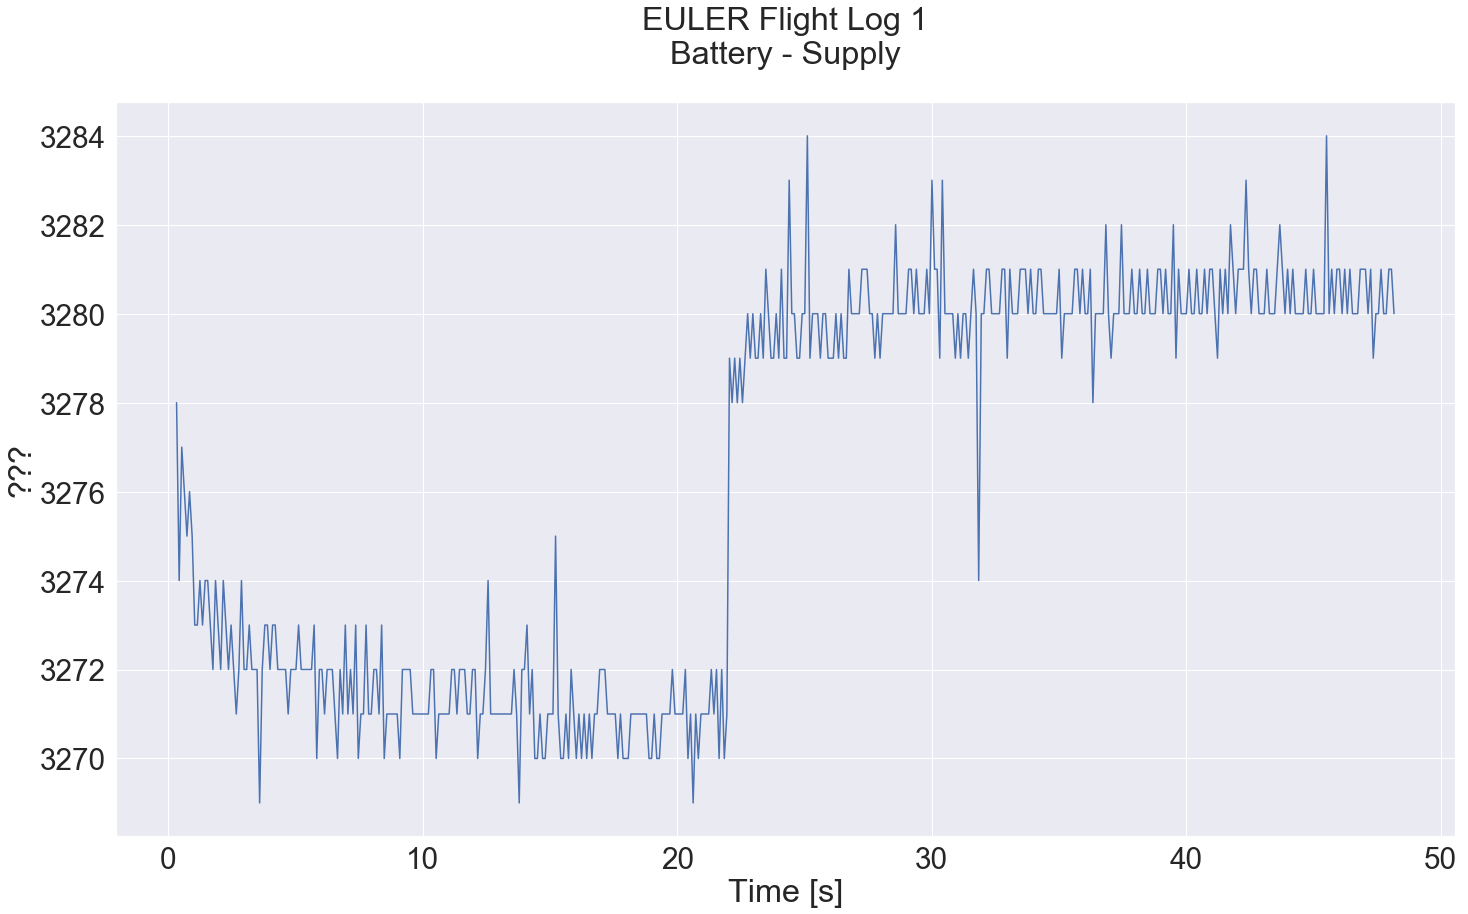

In [52]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Supply')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Supply\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

## Estimator Vars Plotting

In [53]:
estimator_var_log = pd.read_csv(f'{split_logs_dir}/estimator_var.csv', index_col = 0)
estimator_var_log.head()

,Timestamp,Time_s,Log Entry Type,World Position (z),Rocket Velocity (z),Rocket Acceleration (z)
Log Entry,,,,,,
0,1,0.001,ESTIMATOR_VAR,0.0,0.0,0.0
9,13,0.013,ESTIMATOR_VAR,0.0,0.0,0.0
18,23,0.023,ESTIMATOR_VAR,0.0,0.0,0.0
27,33,0.033,ESTIMATOR_VAR,0.0,0.0,0.0
36,43,0.043,ESTIMATOR_VAR,0.0,0.0,0.0


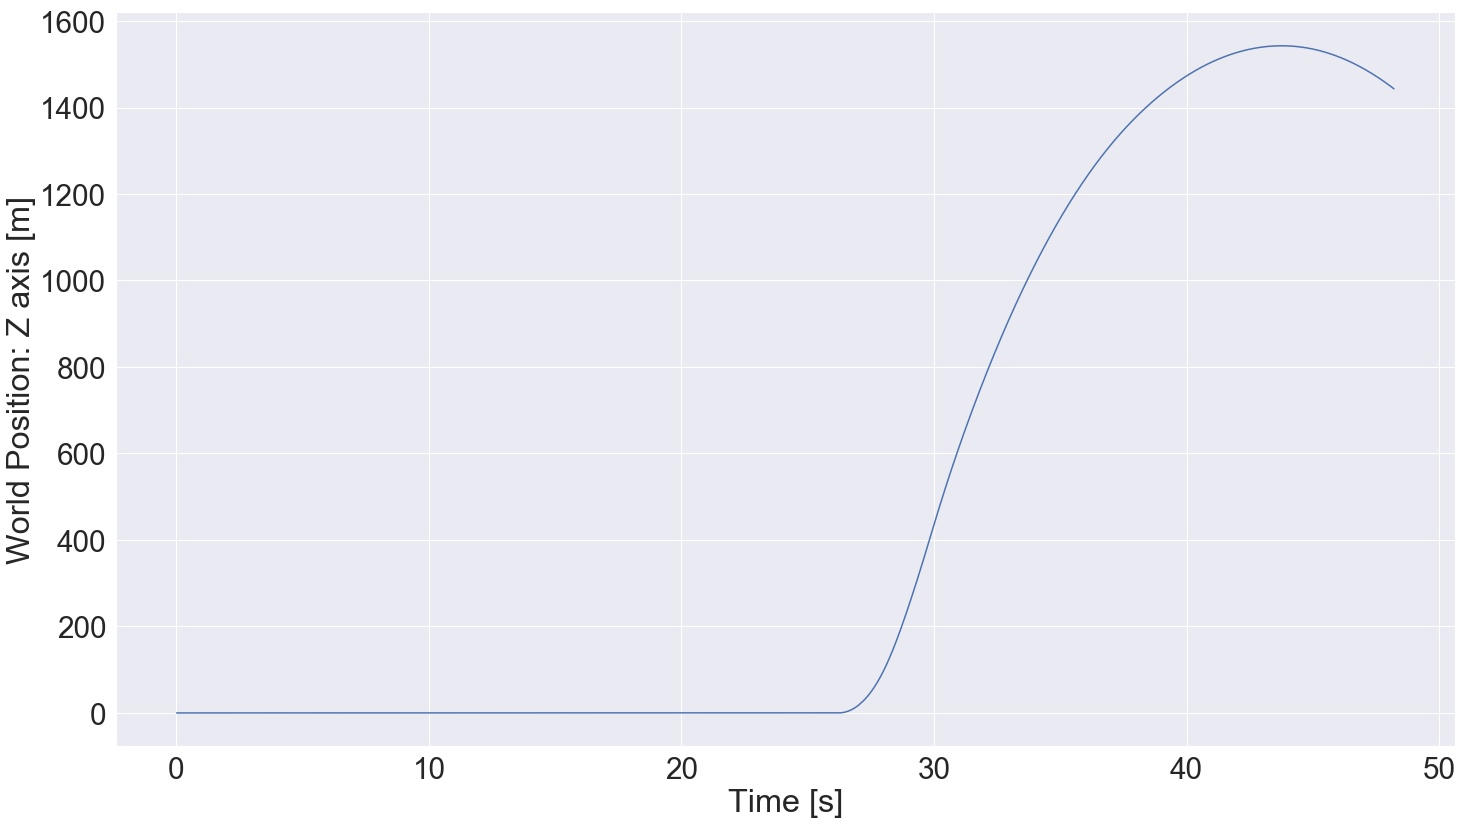

In [54]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'World Position (z)')
plt.set_ylabel('World Position: Z axis [m]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

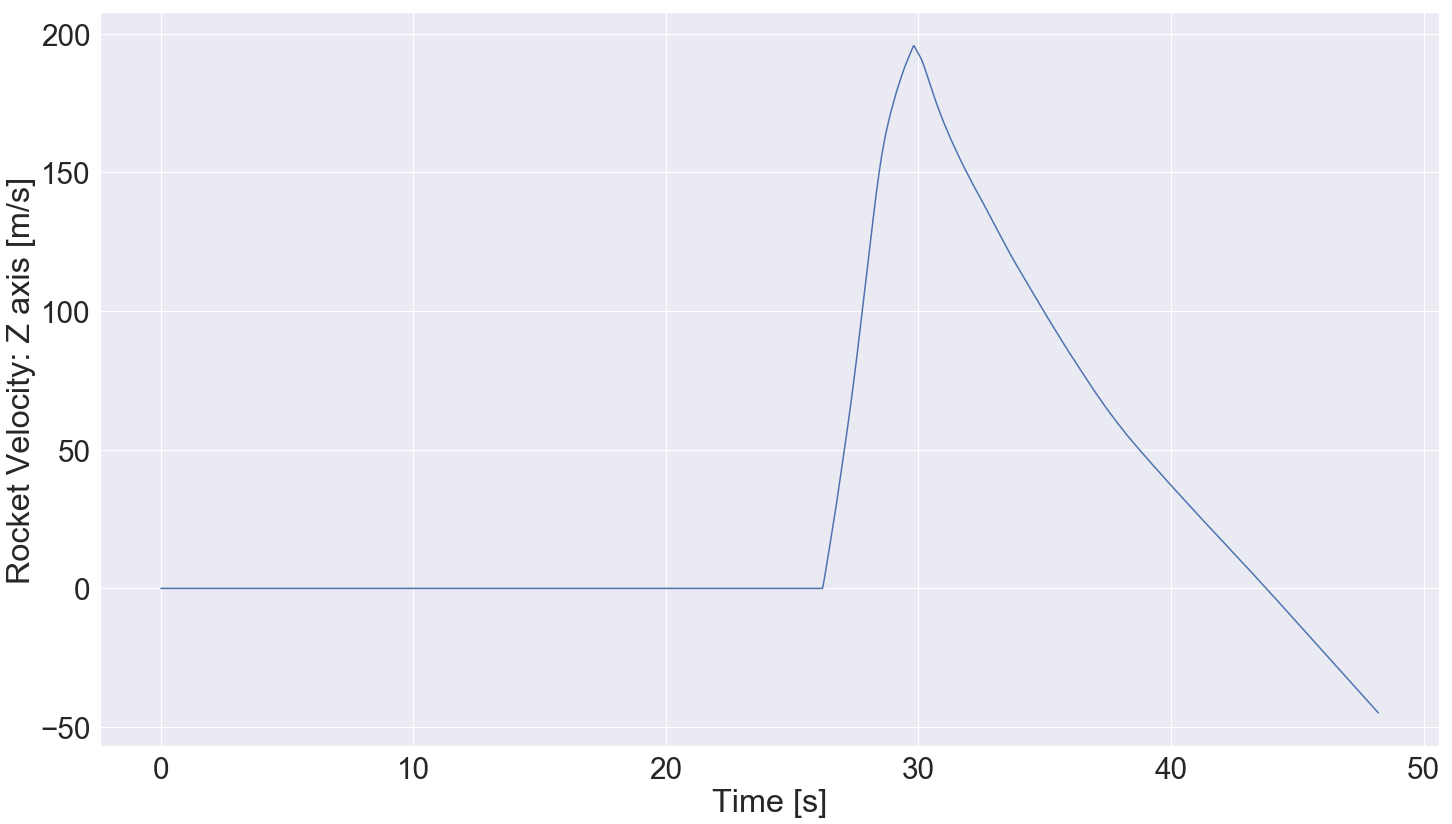

In [55]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'Rocket Velocity (z)')
plt.set_ylabel('Rocket Velocity: Z axis [m/s]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

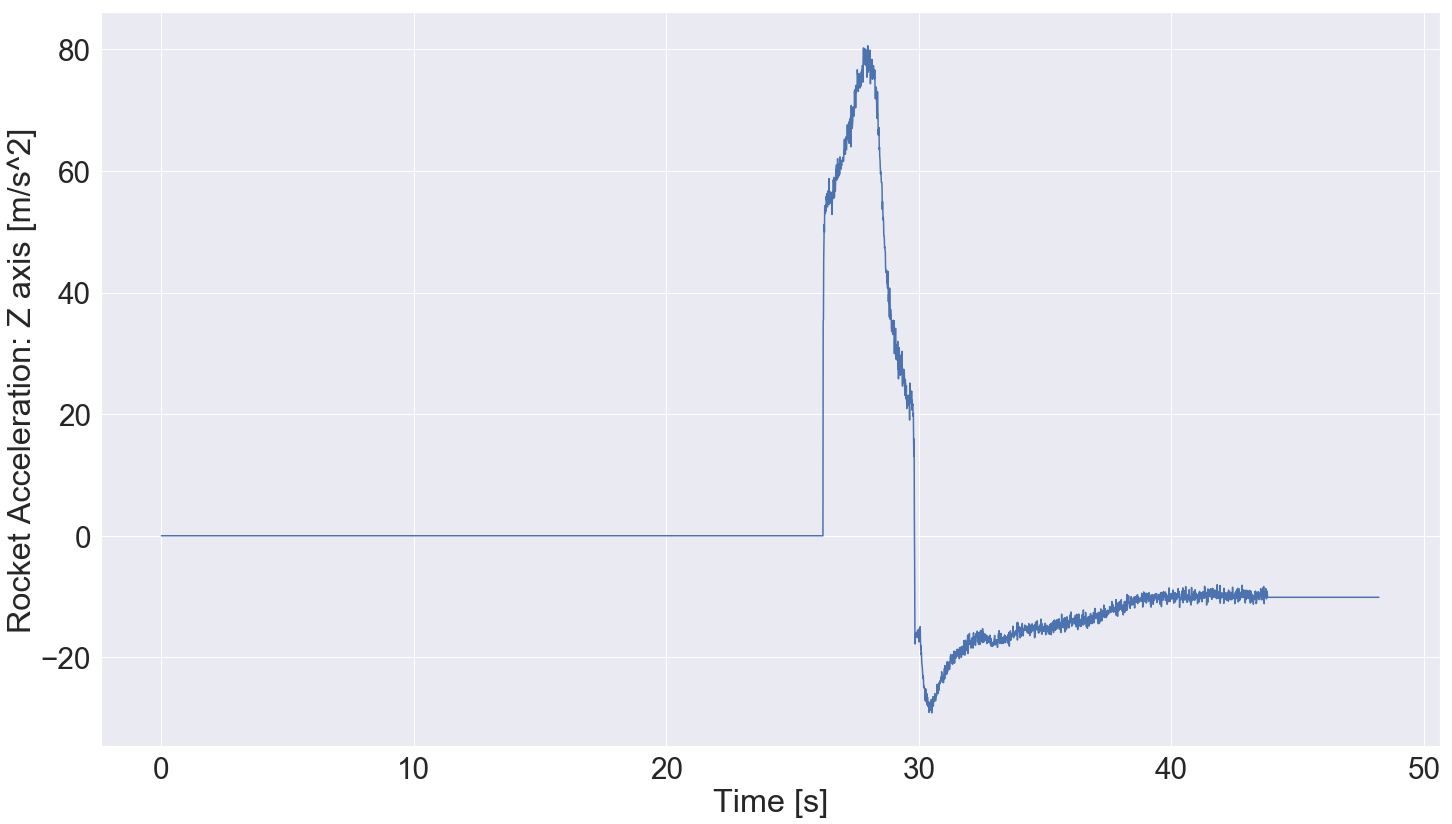

In [56]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'Rocket Acceleration (z)')
plt.set_ylabel('Rocket Acceleration: Z axis [m/s^2]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

In [57]:
controller_out_log = pd.read_csv(f'{split_logs_dir}/controller_out.csv', index_col = 0)
controller_out_log.head()

,Timestamp,Time_s,Log Entry Type,Controller Output,Reference Error,Integrated Error
Log Entry,,,,,,
1,1,0.001,CONTROLLER_OUTPUT,0.0,0.0,0.0
10,13,0.013,CONTROLLER_OUTPUT,0.0,0.0,0.0
19,23,0.023,CONTROLLER_OUTPUT,0.0,0.0,0.0
28,33,0.033,CONTROLLER_OUTPUT,0.0,0.0,0.0
37,43,0.043,CONTROLLER_OUTPUT,0.0,0.0,0.0


In [58]:
controller_out_log['Controller Output'].unique()

array([0.   , 0.001, 0.002, 0.003, 0.005, 0.006, 0.008, 0.011, 0.013,
       0.016, 0.019, 0.022, 0.026, 0.03 , 0.034, 0.039, 0.043, 0.048,
       0.054, 0.059, 0.065, 0.071, 0.078, 0.084, 0.091, 0.099, 0.106,
       0.114, 0.122, 0.13 , 0.139, 0.148, 0.157, 0.167, 0.176, 0.186,
       0.197, 0.207, 0.218, 0.229, 0.241, 0.253, 0.265, 0.277, 0.29 ,
       0.302, 0.316, 0.329, 0.343, 0.357, 0.371, 0.386, 0.401, 0.416,
       0.432, 0.448, 0.464, 0.48 , 0.497, 0.514, 0.531, 0.549, 0.567,
       0.585, 0.604, 0.623, 0.642, 0.661, 0.681, 0.701, 0.722, 0.743,
       0.764, 0.785, 0.807, 0.829, 0.851, 0.873, 0.896, 0.919, 0.943,
       0.967, 0.991, 1.   ])

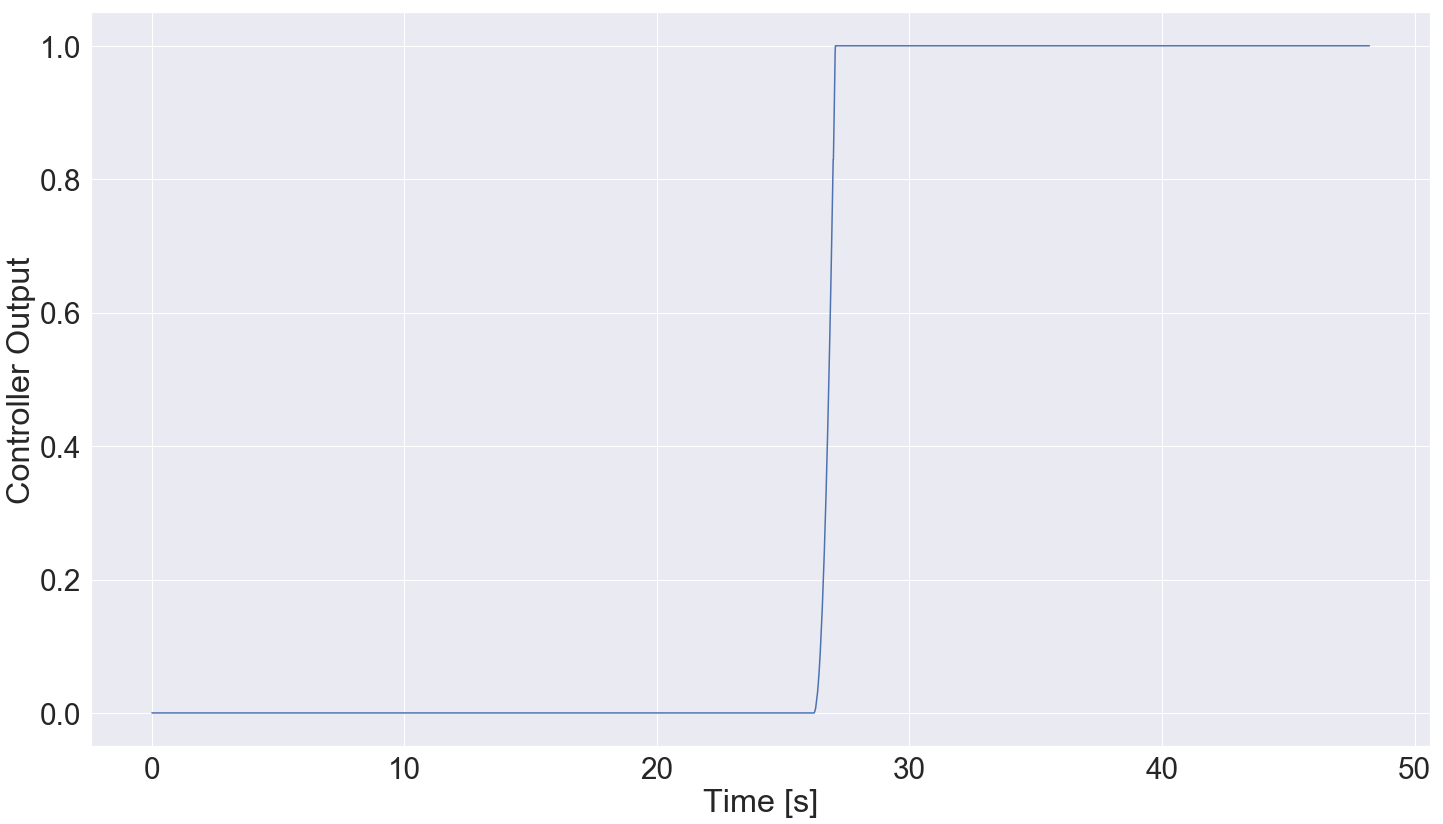

In [59]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Controller Output')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

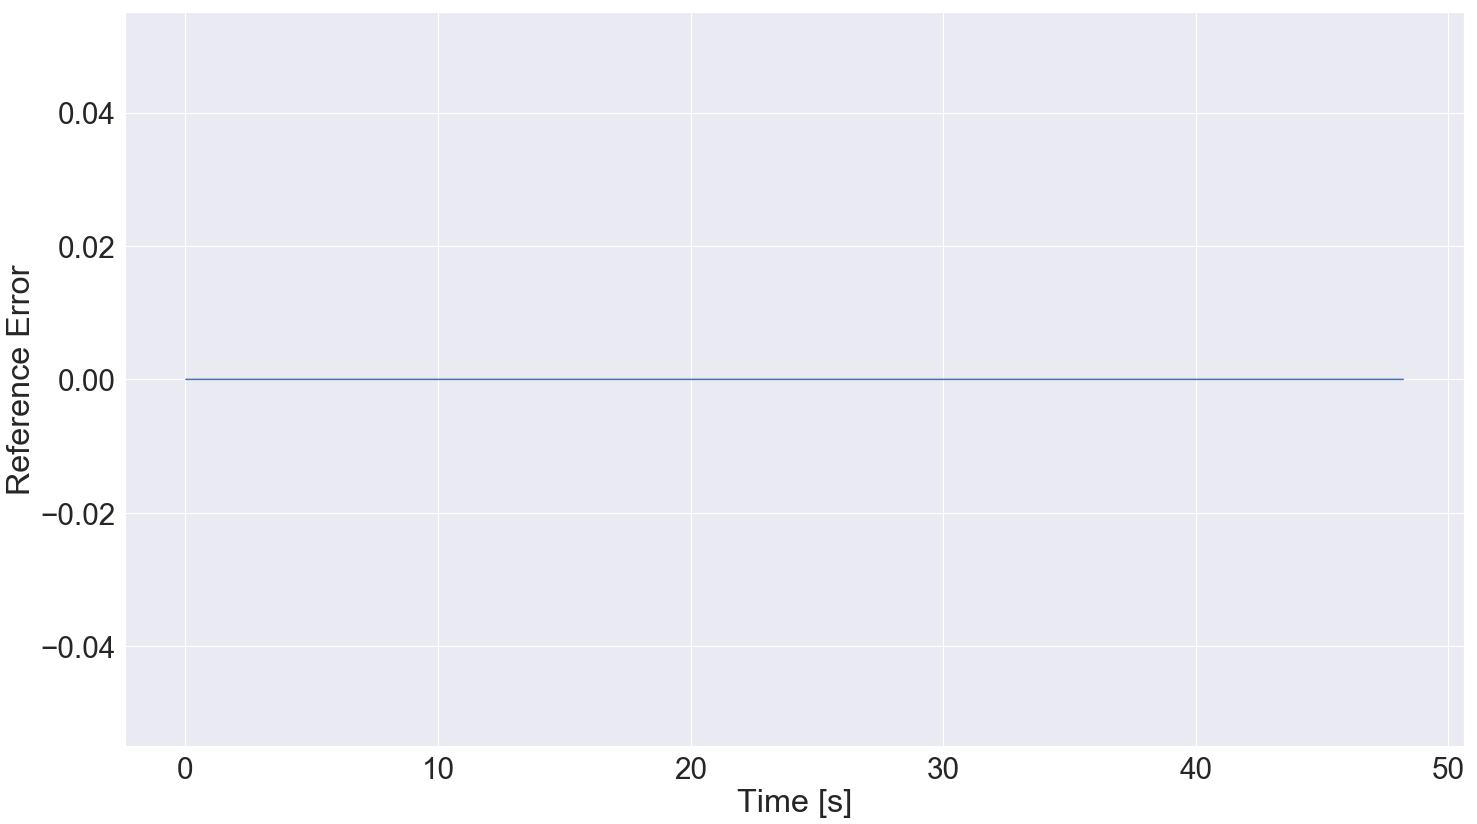

In [60]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Reference Error')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

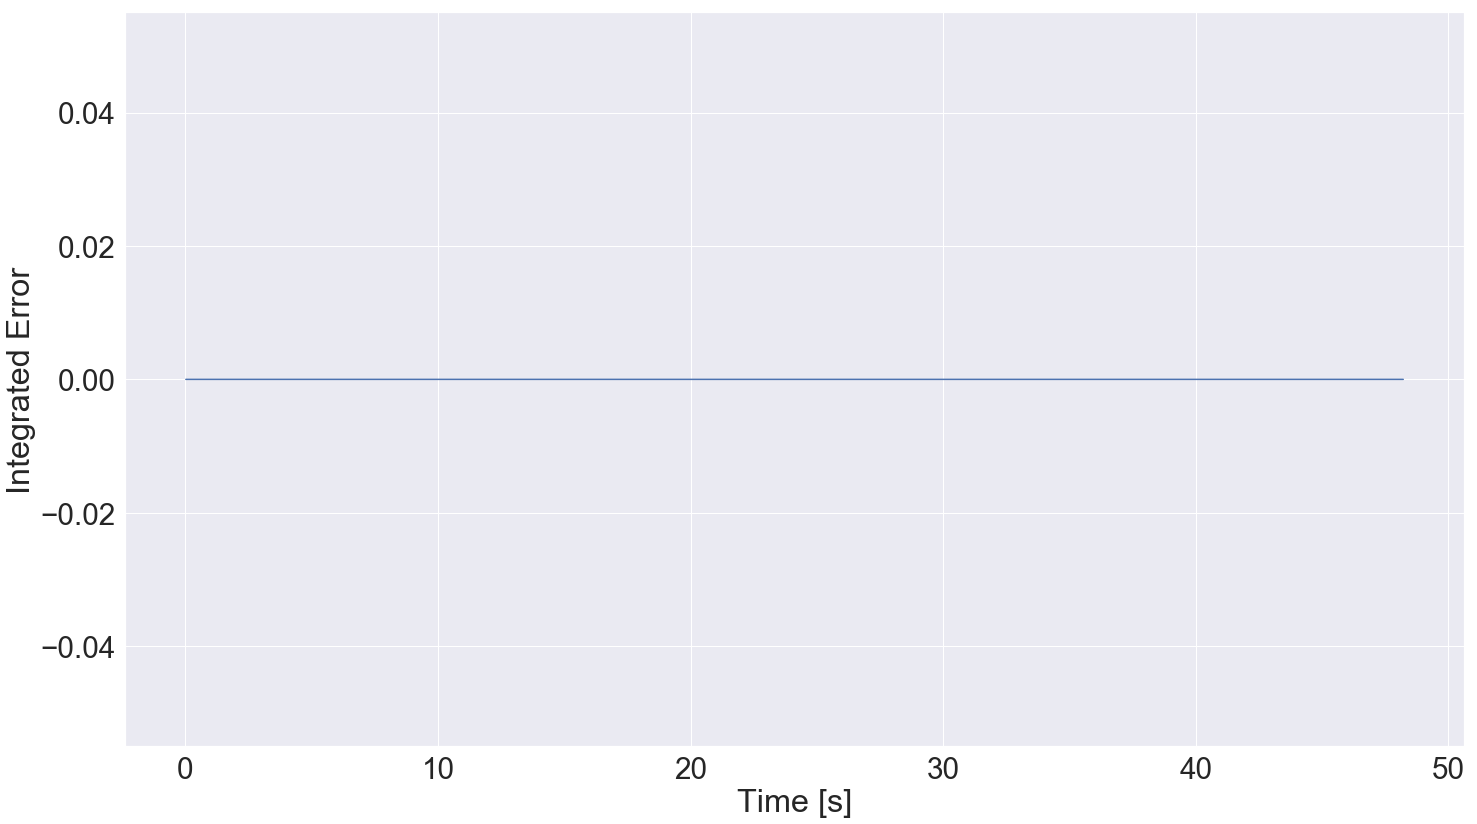

In [61]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Integrated Error')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)